<a href="https://colab.research.google.com/github/suryagokul/sparks-foundation/blob/main/Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

df = pd.read_csv(url)

df[:4]

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


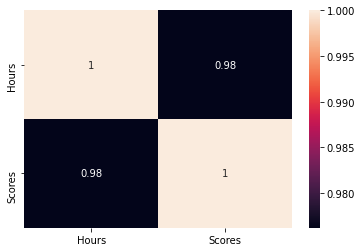

In [ ]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


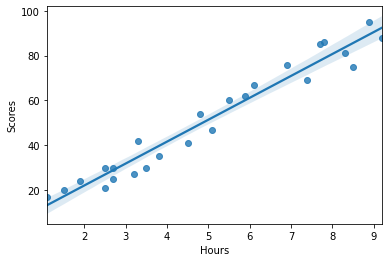

In [ ]:
sns.regplot(df.Hours,df.Scores)

`It gives regression plot as it is straight line so both features are positively correlated..`

In [ ]:
print("Average Score is : ",df.Scores.mean())

Average Score is :  51.48


In [ ]:
print("Average hours Of Study is : ",df.Hours.mean())

Average hours Of Study is :  5.012


In [ ]:
print(f"Least Score is : {df.Scores.min()} \nMinimum No. Of hours studied by a person is : {df.Hours.min()}")

Least Score is : 17 
Minimum No. Of hours studied by a person is : 1.1


In [ ]:
X = df.iloc[:,0]

y = df.iloc[:,-1]

### `Splitting Data`

In [ ]:
df.shape

(25, 2)

In [ ]:
train_size = int(df.Hours.shape[0] * 0.7)


test_size  =  df.shape[0] - train_size

train_size,test_size

(17, 8)

In [ ]:
X_train = X[:train_size]

X_test = X[X_train.shape[0]:]

In [ ]:
print(f"Training Size Of Independent varaiable Hours is : {X_train.shape}\nTesting Size Of Independent varaiable Hours is : {X_test.shape}")

Training Size Of Independent varaiable Hours is : (17,)
Testing Size Of Independent varaiable Hours is : (8,)


In [ ]:
y_train = y[:train_size]

y_test = y[y_train.shape[0]:]

In [ ]:
print(f"Training Size Of Dependent varaiable Scores is : {y_train.shape}\nTesting Size Of Dependent varaiable Scores is : {y_test.shape}")

Training Size Of Dependent varaiable Scores is : (17,)
Testing Size Of Dependent varaiable Scores is : (8,)


### `Building Model and Getting Predictions`

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
X_train = np.array(X_train).reshape(-1,1)

In [ ]:
X_test = np.array(X_test).reshape(-1,1)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
lr_pred

array([20.53555036, 60.98054463, 73.49923333, 28.23935879, 48.46185593,
       38.83209539, 68.68435306, 77.35113755])

In [ ]:
y_test

17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [ ]:
pred_df = pd.DataFrame(lr_pred,columns=['Predicted Scores'])

In [ ]:
actual_df = pd.DataFrame(y_test)

In [ ]:
actual_df.reset_index(drop=True,inplace=True)

In [ ]:
final_df = pd.concat([actual_df,pred_df],axis=1)

final_df

,Scores,Predicted Scores
0,24,20.535550
1,67,60.980545
2,69,73.499233
3,30,28.239359
4,54,48.461856
5,35,38.832095
6,76,68.684353
7,86,77.351138


    There is only slight difference between actual values and predicted values 
    as shown above

In [ ]:
lr.predict([[15]])

array([146.68541345])

In [ ]:
(lr.coef_ * 20)+lr.intercept_

array([194.83421616])

    It's another way to predict using straight line formula y=mx+c 

    where m = coefficient / slope

          c = intercept / bias

### `Evaluating the Model`

In [ ]:
lr.score(X_test,y_test)

0.9342276909497311

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_squared_error(y_test,lr_pred)

30.657089863727688

In [ ]:
mean_absolute_error(y_test,lr_pred)

5.134816050181712

In [ ]:
root_mean_squared_error = np.sqrt(30.657089863727688)

root_mean_squared_error

5.536884490733727